In [4]:
import pandas as pd

df = pd.read_csv("../../data/Default.csv")
df.head()

#classify 'default     

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [5]:
df.shape

(10000, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [7]:
df["student"].value_counts()

student
No     7056
Yes    2944
Name: count, dtype: int64

In [9]:
# unbalanced dataset
df["default"].value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

<Axes: xlabel='balance', ylabel='income'>

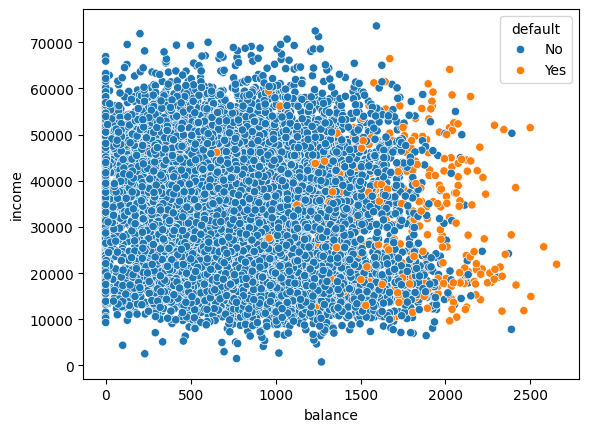

In [13]:
import seaborn as sns

sns.scatterplot(data=df, x= "balance", y= "income", hue= "default")
# shows that the higher debt balance equals higher occurence of default irrespective
# of income

<Axes: xlabel='balance', ylabel='income'>

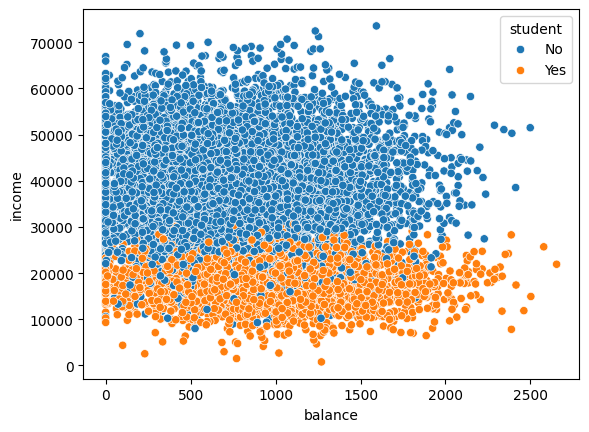

In [14]:
sns.scatterplot(data=df, x= "balance", y= "income", hue= "student")

<Axes: xlabel='default', ylabel='income'>

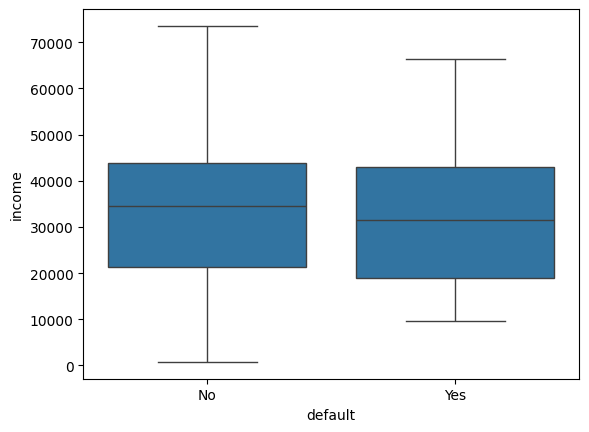

In [17]:
sns.boxplot(data = df, x= "default", y= "income")
# "understanding boxplots"

<Axes: xlabel='default', ylabel='income'>

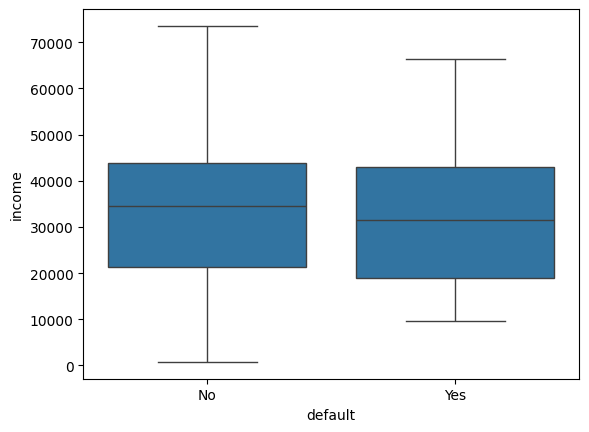

In [19]:
sns.boxplot(data = df, x= "default", y= "income")

## Dummy encoding

In [20]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [21]:
# one-hot encoding - shows all categories on 0 & 1 categories
pd.get_dummies(df) 

,balance,income,default_No,default_Yes,student_No,student_Yes
0,729.526495,44361.625074,True,False,True,False
1,817.180407,12106.134700,True,False,False,True
2,1073.549164,31767.138947,True,False,True,False
3,529.250605,35704.493935,True,False,True,False
4,785.655883,38463.495879,True,False,True,False
...,...,...,...,...,...,...
9995,711.555020,52992.378914,True,False,True,False
9996,757.962918,19660.721768,True,False,True,False
9997,845.411989,58636.156984,True,False,True,False
9998,1569.009053,36669.112365,True,False,True,False


In [24]:
# dummy encoding

pd.get_dummies(df, drop_first=True) #booleans .info()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,False,False
1,817.180407,12106.134700,False,True
2,1073.549164,31767.138947,False,False
3,529.250605,35704.493935,False,False
4,785.655883,38463.495879,False,False
...,...,...,...,...
9995,711.555020,52992.378914,False,False
9996,757.962918,19660.721768,False,False
9997,845.411989,58636.156984,False,False
9998,1569.009053,36669.112365,False,False


In [26]:
df_dummies = pd.get_dummies(df, drop_first=True)*1
df_dummies.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


## Logistic regression

### Train|test split

In [30]:
# feature matrix and label vector
X, y = df_dummies.drop("default_Yes", axis=1), df_dummies["default_Yes"]

X.head()

,balance,income,student_Yes
0,729.526495,44361.625074,0
1,817.180407,12106.134700,1
2,1073.549164,31767.138947,0
3,529.250605,35704.493935,0
4,785.655883,38463.495879,0


In [31]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: default_Yes, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.33, random_state=42 # do a test on commenting out 'random_state'
)
X_train.shape, X_test.shape

((6700, 3), (3300, 3))

In [35]:
print(f"Proportion default in training data: {y_train.sum()/ len(X_train):.3}")
print(f"Proportion default in training data: {y_test.sum()/ len(X_test):.3}")


Proportion default in training data: 0.0333
Proportion default in training data: 0.0333
